<a href="https://colab.research.google.com/github/Emaperidol/AI_ML_Healthcare/blob/main/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Q1.
Mount Google Drive to Colab.

In [6]:
#I don't want to give colab access to my GDrive, sorry, but this is the function
#from google.colab import drive
#drive.mount('/content/drive/')

Saving datasetchnssubset3.csv to datasetchnssubset3 (1).csv


###Q2.
Read the csv file 'dataset-chns-2006-subset3.csv' into a Pandas DataFrame. You may use the read_csv() function: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [7]:
from google.colab import files
import numpy as np
import pandas as pd

uploaded = files.upload()
df = pd.read_csv('datasetchnssubset3.csv')

Saving datasetchnssubset3.csv to datasetchnssubset3 (2).csv


###Q3.
Show the first five observations of the DataFrame. You may use the head() function.

In [9]:
df.head()

,age,gender,systolic,diastolic,weight
0,27,1,128,84,83.0
1,60,1,110,68,70.0
2,38,1,118,80,63.2
3,65,1,138,80,78.2
4,64,1,130,90,77.0


###Q4.
Show describle statistics of the features in the DataFrame. You may use the describe() function.

In [10]:
df.describe()

,age,gender,systolic,diastolic,weight
count,9178.000000,9178.000000,9178.000000,9178.000000,9178.000000
mean,49.077795,1.529963,121.793746,78.848878,60.746383
std,15.188060,0.499129,18.140981,11.120691,12.788114
min,17.000000,1.000000,70.000000,40.000000,19.000000
25%,38.000000,1.000000,110.000000,70.000000,52.000000
50%,49.000000,2.000000,120.000000,80.000000,59.800000
75%,59.750000,2.000000,130.000000,84.000000,67.000000
max,95.000000,2.000000,240.000000,180.000000,169.000000


In [12]:
print(df.columns)

Index(['age', 'gender', 'systolic', 'diastolic', 'weight'], dtype='object')


###Q5.
Create two PyTorch tensors, one for body weight, and the other for systolic blood pressure. Body weight will serve as the independent variable, and systolic blood pressure will serve as the dependent variable. Note: you may need to change the dtype of systolic blood pressure from int to float.

In [39]:
import torch
tensor_w = torch.tensor(df['weight'].values, dtype=torch.float32)
tensor_s = torch.tensor(df['systolic'].values, dtype=torch.float32)

print(tensor_w, tensor_s)

tensor([83.0000, 70.0000, 63.2000,  ..., 55.5000, 68.0000, 46.6000]) tensor([128., 110., 118.,  ..., 132., 124., 108.])


###Q6.
Standardize the two tensors so that they have mean of zero and standard devision of one.

In [40]:
tensor_w =(tensor_w - tensor_w.mean()) / tensor_w.std()
tensor_s = (tensor_s - tensor_s.mean()) / tensor_s.std()

print(tensor_w, tensor_s)

tensor([ 1.7402,  0.7236,  0.1919,  ..., -0.4103,  0.5672, -1.1062]) tensor([ 0.3421, -0.6501, -0.2091,  ...,  0.5626,  0.1216, -0.7604])


###Q7.
Randomly shuffle and split train and validation set indices. Keep 80% of data in the train set and the other 20% in the validation set.

In [41]:
from sklearn.model_selection import train_test_split
indices = torch.randperm(len(tensor_w))
train_indices = indices[:int(0.8 * len(indices))]
val_indices = indices[int(0.8 * len(indices)):]


###Q8.
Used the train and validation indices to split the dataset into train set and validation set.

In [44]:
x_train, y_train = tensor_w[train_indices], tensor_s[train_indices]
x_val, y_val = tensor_w[val_indices], tensor_s[val_indices]

print(x_train, y_train, x_val, y_val)


tensor([ 8.2306, -0.1757, -0.6370,  ..., -1.3095, -1.2313, -0.4337]) tensor([-0.0989, -0.4296, -0.9257,  ..., -0.6501,  0.2319,  0.3421]) tensor([ 1.3492, -0.6839, -0.9185,  ...,  0.0668, -0.9185,  0.1371]) tensor([ 0.8934, -0.0989, -0.6501,  ...,  0.4524, -1.0911,  1.2241])


###Q9.
Define the model, which takes the form of
```
w * x + b
```
in which w and b are weight and bias, respectively; and x is your only independent variable.

In [45]:
def model(x, params):
    w, b = params
    return w * x + b

###Q10.
Define your loss funtion, which takes the form of
```
(y_predicted - y)**2
```
in which y is your dependent variable, and y_predicted in the predicted dependent variable from the model.

In [35]:
def loss_fn(y_pred, y):
    return ((y_pred - y) ** 2).mean()

###Q11.
Define the training loop. The training loop will take the following arguments:
* n_epochs: number of epochs to run
* optimizer: optimizer
* params: a tensor containing the initial values for weight and bias
* x_train: body weight in the train set
* y_train: systolic blood pressure in the train set
* x_val: body weight in the validation set
* y_val: systolic blood pressure in the validation set

\
Hints:
* Remember to use with torch.no_grad() because you do not want gradients to cumulate on validation loss
* Remember to use optimizer.zero_grad() to zero the gradients after each run
* Use backward() function for backpropagation
* Create two lists to store the train and validation loss over epochs

In [50]:
from torch import optim

def training_loop(n_epochs, optimizer, params, x_train, y_train, x_val, y_val):
    train_loss = []
    val_loss = []
    for epoch in range(n_epochs):
        y_pred_train = model(x_train, params)
        t_loss = loss_fn(y_pred_train, y_train)
        train_loss.append(t_loss.item())

        optimizer.zero_grad()
        t_loss.backward()
        optimizer.step()

        with torch.no_grad():
            y_pred_val = model(x_val, params)
            loss_val = loss_fn(y_pred_val, y_val)
            val_loss.append(loss_val.item())
    return train_loss, val_loss



###Q12.
Invoke the training loop. Set the following parameters:
```
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 0.05
n_epochs = 100
optimizer = optim.SGD([params], lr = learning_rate)
```

In [51]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 0.05
n_epochs = 100
optimizer = optim.SGD([params], lr=learning_rate)

train_loss, val_loss = training_loop(n_epochs, optimizer, params, x_train, y_train, x_val, y_val)


###Q13.
Report the estimated weight and bias.

In [52]:
print(params)

tensor([ 0.2054, -0.0008], requires_grad=True)


###Q14.
Plot train and validation loss across epochs in a single figure.

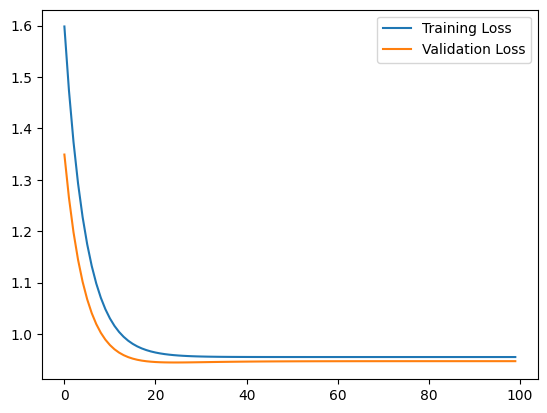

In [53]:
import matplotlib.pyplot as plt

plt.plot(range(n_epochs), train_loss, label='Training Loss')
plt.plot(range(n_epochs), val_loss, label='Validation Loss')
plt.legend()
plt.show()


###Q15.
Compare the estimated weight and bias with a linear regression estimate. You can run a linear regression using the famous sklearn module.

Hint:
```
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
```

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train.detach().numpy().reshape(-1, 1), y_train.detach().numpy())
print(f"Sklearn weight: {lr.coef_[0]}, bias: {lr.intercept_}")

Sklearn weight: 0.20540058612823486, bias: -0.000813765567727387
